* Import google drive

In [2]:

from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


* Import Santander folder from my drive

In [3]:

import os
os.chdir("/gdrive/My Drive/santander")

In [6]:
import pandas as pd
train = pd.read_csv("train.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)
train.shape

trainDropNA = train.dropna()

trainDropNA.shape


(200000, 201)

* Using dropna() function drop all NA values

In [7]:

test.shape

testDropNA = test.dropna()

testDropNA.shape

X=train.iloc[:,1:]
X.head
y=train.iloc[:,0]
y.head

<bound method NDFrame.head of ID_code
train_0         0
train_1         0
train_2         0
train_3         0
train_4         0
               ..
train_199995    0
train_199996    0
train_199997    0
train_199998    0
train_199999    0
Name: target, Length: 200000, dtype: int64>

* Import the necessary modules

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2020)

# Stochastic gradient descent (SGD Classifier)
 * Stochastic gradient method optimized by the rate of convergence .
 * the gradient of the loss is estimated each sample at a time .

In [9]:

from sklearn.linear_model import SGDClassifier
sgdClass = SGDClassifier(loss='log',random_state=2020)
sgdClass.fit(X_train,y_train)
y_pred = sgdClass.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[53454   540]
 [ 4790  1216]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53994
           1       0.69      0.20      0.31      6006

    accuracy                           0.91     60000
   macro avg       0.81      0.60      0.63     60000
weighted avg       0.90      0.91      0.89     60000

0.9111666666666667


*  Plot ROC curve

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = sgdClass.predict_proba(X_test)[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

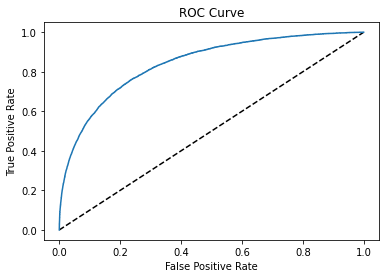

0.8420125052806463

In [11]:


import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

# SGD Classifier model tunning 
 * Table of Grid Search CV Results
 * performing hyper parameter tunning in order to determine the optimal values for given mode.
 * This is significant as the performnace of the entire model is based on the hyper parameter value specified.

In [13]:
import numpy as np

from sklearn.model_selection import GridSearchCV

eta_range = np.linspace(0.001,1.2)

sgdClass = SGDClassifier(loss='log',learning_rate='constant',
                         eta0=0.00001,random_state=2019)
parameters = dict( eta0 = eta_range )
svmGrid = GridSearchCV(sgdClass, param_grid=parameters, cv=5,
                       scoring='roc_auc')
svmGrid.fit(X, y)

y_pred_probGrid1=svmGrid.predict_proba(test)[:,1]


submit_dict = {'ID_code':list(test.index)  ,'target':y_pred_probGrid1}
submit = pd.DataFrame.from_dict(submit_dict)

submit.to_csv("submit_sgdgrid.csv",index=False)


print(svmGrid.best_params_)

print(svmGrid.best_score_)

{'eta0': 0.001}
0.8159084888604236


# Gaussian Naive Bayes
 * Describe that probability of an event based on prior knowledge of conditions be related of conditions to the event. 

In [14]:


from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
y_pred=gaussian.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[53087   907]
 [ 3764  2242]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     53994
           1       0.71      0.37      0.49      6006

    accuracy                           0.92     60000
   macro avg       0.82      0.68      0.72     60000
weighted avg       0.91      0.92      0.91     60000

0.92215


In [15]:
#######

gaussian=GaussianNB()
gaussian.fit(X,y)
y_pred_prob=gaussian.predict_proba(test)[:,1]

submit_dict = {'ID_code':list(test.index)  ,'target':y_pred_prob}
submit = pd.DataFrame.from_dict(submit_dict)

submit.to_csv("submit_gaussianNB.csv",index=False)

# DECISION TREE CLASSIFIER 
 * The goal of DECISION TREE CLASSIFIER is to split data into groups such as every element in one group belong to the same category.
 * DECISION TREE CLASSIFIER create a set of binary split on the predictor variables.

In [16]:


from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(random_state=2020)
clf=clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[48614  5380]
 [ 4694  1312]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     53994
           1       0.20      0.22      0.21      6006

    accuracy                           0.83     60000
   macro avg       0.55      0.56      0.56     60000
weighted avg       0.84      0.83      0.84     60000

0.8321


In [17]:
##########
clf=DecisionTreeClassifier(random_state=2020)
clf=clf.fit(X,y)
y_pred_prob5=clf.predict_proba(test)[:,1]

submit_dict = {'ID_code':list(test.index)  ,'target':y_pred_prob5}
submit = pd.DataFrame.from_dict(submit_dict)

submit.to_csv("submit_dectreeclf.csv",index=False)

# RANDOM FOREST 
 * RANDOM FOREST is an ensembled learning approach multiple productive models are developed and result are aggreated to improve precision .
 * Ouecomes is considered as per majority in different trees.
 * Creats a set of Decision Trees from randomly selected subset of training set
 * It then aggreagates the votes from different desicion trees to descrete final class of test object. 

In [18]:


from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[53994     0]
 [ 6004     2]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53994
           1       1.00      0.00      0.00      6006

    accuracy                           0.90     60000
   macro avg       0.95      0.50      0.47     60000
weighted avg       0.91      0.90      0.85     60000

0.8999333333333334


In [ ]:
#############

random=RandomForestClassifier(n_estimators=10)
random.fit(X,y)

y_pred_prob1=random.predict_proba(test)[:,1]

submit_dict = {'ID_code':list(test.index)  ,'target':y_pred_prob1}
submit = pd.DataFrame.from_dict(submit_dict)

submit.to_csv("submit_randomF.csv",index=False)

# XGBOOST Classifier
* Boosting refers to a family of algorithm which converts weak learner to strong learner.
* Weak learner is less prececision and Strong learner is more precision.

In [19]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=2000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))



[[53987     7]
 [ 5902   104]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53994
           1       0.94      0.02      0.03      6006

    accuracy                           0.90     60000
   macro avg       0.92      0.51      0.49     60000
weighted avg       0.91      0.90      0.86     60000

0.9015166666666666



# Plot ROC curve

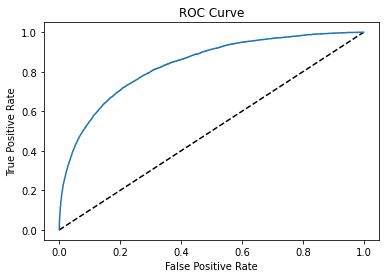

0.8361238840180945

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_prob = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [21]:



clf = XGBClassifier(random_state=2000)
clf.fit(X,y)
y_pred_prob2=clf.predict_proba(test)[:,1]

submit_dict = {'ID_code':list(test.index)  ,'target':y_pred_prob2}
submit = pd.DataFrame.from_dict(submit_dict)

submit.to_csv("submit_xgboost.csv",index=False)

 # MLP CLASSIFIER (Multilayer Perceptron )
 * Neural network with input layer ,one or more hidden layer and one output layer is called MLP .
 * Neural network is constructed from a number of interconnected nodes called neutrons.
 *neutrons are arranged into input layer,hidden layer and output layer.

In [42]:


from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3,3,2),activation='tanh',
                    random_state=2018)
mlp.fit( X_train , y_train )
y_pred = mlp.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[53994     0]
 [ 6006     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53994
           1       0.00      0.00      0.00      6006

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000

0.8999


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:

mlp = MLPClassifier(hidden_layer_sizes=(3,3,2),activation='tanh',
                    random_state=2018)
mlp.fit( X, y )
y_pred_prob3=mlp.predict_proba(test)[:,1]

submit_dict = {'ID_code':list(test.index)  ,'target':y_pred_prob3}
submit = pd.DataFrame.from_dict(submit_dict)

submit.to_csv("submit_mlp.csv",index=False)

# VOTING CLASSIFIER
* Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.

In [44]:


from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier(random_state=2019)

mlp = MLPClassifier(hidden_layer_sizes=(3,3,2),activation='tanh',
                    random_state=2018)

clf = XGBClassifier(random_state=2000)

gaus=GaussianNB()

rdmf=RandomForestClassifier(n_estimators=100)

Voting = VotingClassifier(estimators=[('DT',dtc),('ML',mlp),
                             ('XG',clf),('GU',gaus)],voting='soft')


Voting.fit(X,y)
y_pred_vot1 = Voting.predict(X_test)

print(confusion_matrix(y_test, y_pred_vot1))
print(classification_report(y_test, y_pred_vot1))
print(accuracy_score(y_test,y_pred_vot1))
y_pred_probvot = Voting.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_probvot))


[[53993     1]
 [ 3551  2455]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     53994
           1       1.00      0.41      0.58      6006

    accuracy                           0.94     60000
   macro avg       0.97      0.70      0.77     60000
weighted avg       0.94      0.94      0.93     60000

0.9408
0.9970209656008078


In [ ]:
submit_dict = {'ID_code':list(test.index)  ,'target':y_pred_probvot}
submit = pd.DataFrame.from_dict(submit_dict,encoding='utf-8')

submit.to_csv("submit_vot.csv",index=False)



# Multiple acc in one Graph

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [49]:

classifiers=[RandomForestClassifier(random_state=2020),GaussianNB(),
            DecisionTreeClassifier(random_state=2020),MLPClassifier(hidden_layer_sizes=(3,3,2),activation='tanh',
                    random_state=2020),SGDClassifier(loss='log',random_state=2020), XGBClassifier(random_state=2020)]

* Define a result table as a DataFrame

In [50]:

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])



* Train the models and record the results

In [51]:

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

* Set name of the classifiers as index labels

In [52]:

result_table.set_index('classifiers', inplace=True)

# Plot the figure

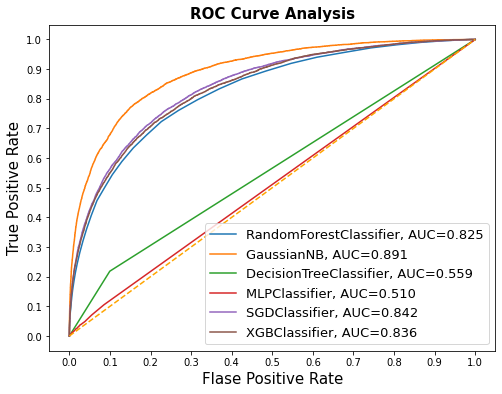

In [53]:

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* From above ROC curve we found Gaussian Navie bayes has highest accuracy. Hence we can say its a best model for our data.